# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

A normal distribution looks like the below using the mean and standard deviation of the temperature data (using sampling Numpy normal function).

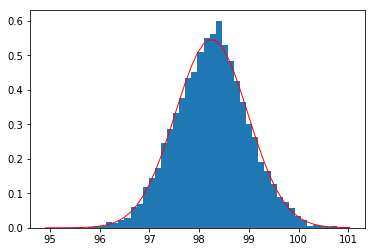

In [4]:
def plot_hist_normal(data, mean, std):
    count, bins, ignored = plt.hist(data, 50, density=True)
    plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
          linewidth=1, color='r')
np.random.seed(4678)
mu, sigma = np.mean(df.temperature), np.std(df.temperature) # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
plot_hist_normal(s, mu, sigma)
plt.show()

Graphing the temperature data shows the below.

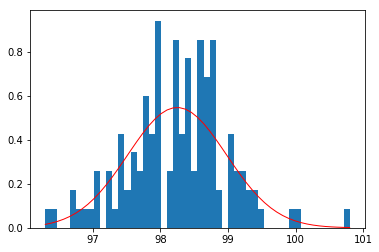

In [5]:
# See how the distribution would look if
mu, sigma = np.mean(df.temperature), np.std(df.temperature) # mean and standard deviation
plot_hist_normal(df.temperature, mu, sigma)
plt.show()

The sample size is too small for it to be certain it is normal. So lets compare quantiles.

In [6]:
# The quantiles of the normal sample.
lst_quantiles = np.arange(10, 100, step=10)
lst_norm_quant = np.percentile(s, lst_quantiles)
lst_data_quant = np.percentile(df.temperature, lst_quantiles)
lst_diff_quant = lst_data_quant - lst_norm_quant
print(lst_norm_quant, lst_data_quant, lst_diff_quant)

[97.31040642 97.63605811 97.87685483 98.08261627 98.26372188 98.43559224
 98.6238563  98.84519706 99.17662082] [97.29 97.7  97.9  98.1  98.3  98.44 98.63 98.8  99.1 ] [-0.02040642  0.06394189  0.02314517  0.01738373  0.03627812  0.00440776
  0.0061437  -0.04519706 -0.07662082]


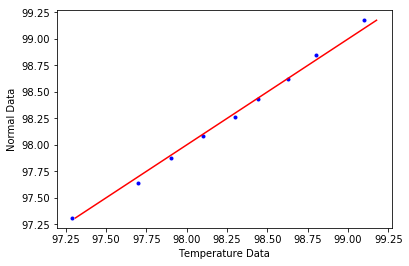

In [7]:
_ = plt.plot(lst_data_quant, lst_norm_quant, marker='.', linestyle='none', color='blue')
_ = plt.plot(lst_norm_quant, lst_norm_quant, color='red')
_ = plt.xlabel('Temperature Data')
_ = plt.ylabel('Normal Data')
plt.show()

Based on graphing the quantiles, the data does look approximately normal.
Let's run some frequentist tests.

In [8]:
dct_freq_p = {}
alpha = 0.05 # Significance level.

# Shapiro-Wilk Test
test_stat, dct_freq_p["Shapiro-Wilk"] = stats.shapiro(df.temperature)
# D’Agostino’s K^2 Test
test_stat, dct_freq_p["DAgostino-Pearson"] = stats.normaltest(df.temperature)
for test, p in dct_freq_p.items():
    if p > alpha:
        print('Under the %s test, sample looks normal (fail to reject H0)' % (test))
    else:
        print('Under the %s test, sample does not look normal (reject H0)' % (test))
    
# Anderson-Darling Test
result = stats.anderson(df.temperature)
print('The Anderson-Darling Test statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
#dct_freq_p

Under the Shapiro-Wilk test, sample looks normal (fail to reject H0)
Under the DAgostino-Pearson test, sample looks normal (fail to reject H0)
The Anderson-Darling Test statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


#### The data according to graphical and frequentist test is normal.

### 2. Is the sample size large? Are the observations independent?

There are 130 observations within the dataset.
There are enough observations based on the central limit theorem's general rule of a sample size at least 30 observations.
Each observation is independent, since it would require a re-measurement of the individual's temperature. 
Even if it was the same indidual, it would be independent of the previous measurement. 

### 3. Is the true population mean really 98.6 degrees F?
#### Bootstrap Hypothesis Test
**Null hypothesis: Human body temperature is 98.6 degrees F.**

*Temp == 98.6

**Alternate hypothesis: Human body temperature is NOT 98.6 degree F.**

*Temp != 98.6*

*Alpha == 0.05*

In [9]:
def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)

    return bs_replicates

# Create calculation function
def diff_from_accepted(data, accepted=98.6):
    '''Calculate the difference of the mean from the accepted value.'''
    
    return np.mean(data) - accepted

def p_value_results(p_val, alpha_val):
    print('The p-value is %s.' % p_val)
    if p_value >= alpha:
        print('The p-value is greater (or equal to) than the level of significance (%f).' % alpha_val)
        print('That means we can not reject the null hypothesis.')
    else:
        print('The p-value is less than the level of significance (%f).' % alpha_val)
        print('That means we should reject the null hypothesis.')

The difference in means from observed and accepted value is -0.35076923076921673
The p-value is 0.0.
The p-value is less than the level of significance (0.050000).
That means we should reject the null hypothesis.


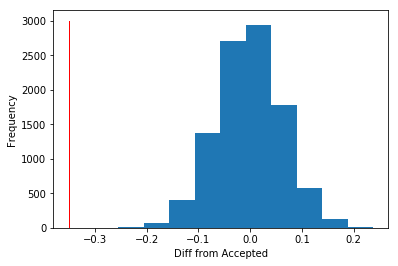

In [10]:
temp_accepted = 98.6
temp_orig = df.temperature
temp_shift = temp_orig - np.mean(s) + temp_accepted

diff_observed = diff_from_accepted(temp_orig, temp_accepted)
print('The difference in means from observed and accepted value is %s' % diff_observed)
# Use the shifted data since that reflects the null hypothesis.
bs_temps = draw_bs_reps(temp_shift, diff_from_accepted, 10000)
p_value = np.sum(bs_temps <= diff_observed) / len(bs_temps)

# Plot it graphically.
count, bins, ignored = plt.hist(bs_temps)
_ = plt.plot([diff_observed, diff_observed], [0, 3000], linewidth=1, color='r')
_ = plt.xlabel('Diff from Accepted')
_ = plt.ylabel('Frequency')
plt.show

p_value_results(p_value, alpha)

Based on the above, we should reject the null hypothesis.
Let's do a frequentist test. The hypotheses are the same as above.
Since the standard deviation of the population is not known, a t-test statistic is appropriate.

In [11]:
# Calculate the two tailed test t-test value.
t_test, p_value = stats.ttest_1samp(df.temperature, temp_accepted)
p_value_results(p_value, alpha)

The p-value is 2.4106320415561276e-07.
The p-value is less than the level of significance (0.050000).
That means we should reject the null hypothesis.


As requested, calculate the two tailed z-test statistic.

In [12]:
# Calculate the z-test value, using the sample standard deviation as a proxy.
z_test = (np.mean(df.temperature) - temp_accepted) / \
        (np.std(df.temperature) / np.sqrt(len(df.temperature)))
p_value = stats.norm.cdf(z_test) * 2
p_value_results(p_value, alpha)

The p-value is 4.3523151658821886e-08.
The p-value is less than the level of significance (0.050000).
That means we should reject the null hypothesis.


The p_values are different given that the distributions are different but the results of the accepted value still place it outside the distribution generated by the observed sample.

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [13]:
temp_small = np.random.choice(df.temperature, size=10)

# Calculate the two tailed test t-test value.
t_test, p_value = stats.ttest_1samp(temp_small, temp_accepted)
p_value_results(p_value, alpha)

The p-value is 0.1609782639781601.
The p-value is greater (or equal to) than the level of significance (0.050000).
That means we can not reject the null hypothesis.


In [14]:
# Calculate the z-test value, using the larger sample's standard deviation as a proxy.
z_test = (np.mean(temp_small) - temp_accepted) / \
        (np.std(df.temperature) / np.sqrt(len(temp_small)))
p_value = stats.norm.cdf(z_test) * 2
p_value_results(p_value, alpha)

The p-value is 0.12966663158958022.
The p-value is greater (or equal to) than the level of significance (0.050000).
That means we can not reject the null hypothesis.


The impact of having less observations decreases the amount of accuracy expected from the standard deviation. So the result becomes much more conservative.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Using the bootstrap method, and the original observations, let's find out what is the distribution of the lower and upper quantiles.

<function matplotlib.pyplot.show(*args, **kw)>

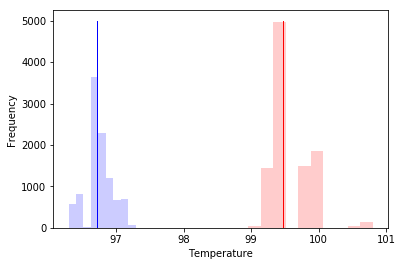

In [15]:
def lower_quant(data):
    '''Find the lower percentile, specifically 2.5.'''
    return np.percentile(data, 2.5)
def upper_quant(data):
    '''Find the upper percentile, specifically 97.5.'''
    return np.percentile(data, 97.5)

# Create a set of distributions to find a what the average lower (2.5%) and upper (97.5) quantiles
bs_lower_quant = draw_bs_reps(temp_orig, lower_quant, 10000)
bs_upper_quant = draw_bs_reps(temp_orig, upper_quant, 10000)
lower_quant_obs = lower_quant(df.temperature)
upper_quant_obs = upper_quant(df.temperature)
# Plot it graphically.
count, bins, ignored = plt.hist(bs_lower_quant, alpha=0.2, color='blue')
count, bins, ignored = plt.hist(bs_upper_quant, alpha=0.2, color='red')
_ = plt.plot([lower_quant_obs, lower_quant_obs], [0, 5000], linewidth=1, color='blue')
_ = plt.plot([upper_quant_obs, upper_quant_obs], [0, 5000], linewidth=1, color='red')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
plt.show



Given warm-blooded organisms require a steady temperature, and our level of significance is 5%, then anything outside of the 2.5% tails should be considered abnormal. Creating replicates of our distribution many times and then calculating the average of the 2.5% tails (the extremes) should be considered abnormal.

In [16]:
print('That means anything between %0.2f and %0.2f should be considered abnormal.' % 
      (np.mean(bs_lower_quant), np.mean(bs_upper_quant)))

That means anything between 96.77 and 99.58 should be considered abnormal.


In [17]:
# Calculate the margin of error.
z_score = stats.norm.ppf(.975)
margin_of_error = z_score * np.std(df.temperature) / np.sqrt(len(df.temperature))

print('Margin of error:  %0.3f.' % margin_of_error)
print('Confidence interval of the original data is:  %0.3f to %0.3f.' % 
      (lower_quant_obs, upper_quant_obs))

Margin of error:  0.126.
Confidence interval of the original data is:  96.722 to 99.478.


#### 6. Is there a significant difference between males and females in normal temperature?

The proper test for this is a two sample t-test for a difference in means.
The hypotheses and level of significance is:
**Null hypothesis: Female normal temperature is equal to male normal temperature.**

*Female Temp == Male Temp*

**Alternate hypothesis: Female normal temperature is NOT equal to male normal temperature.**

*Female Temp != Male Temp*

*Alpha == 0.05*

In [18]:
## Calculate the t test statistic
temp_female = df[df['gender'] == 'F']['temperature']
temp_male = df[df['gender'] == 'M']['temperature']
std_female = np.std(temp_female, ddof=1)
std_male = np.std(temp_male, ddof=1)
mean_diff = np.mean(temp_female) - np.mean(temp_male)
t_test, p_value = stats.ttest_ind(temp_female, temp_male, equal_var=False)

p_value_results(p_value, alpha/2)

The p-value is 0.023938264182934196.
The p-value is less than the level of significance (0.025000).
That means we should reject the null hypothesis.


Based on the p_value obtained from the two tailed t test statistic, the difference in means would fall outside of the confidence interval, and that means we should **reject** the null hypothesis at this time.